# Vector Data Operations

For this exercise, you will build on what you have learned to load data and then perform some basic calculations.

The following data sets will be used: 

 * United States Polys - http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_20m.zip More information can be found [here](https://www.census.gov/geo/maps-data/data/cbf/cbf_description.html)
 *  Hiking Trails Data - http://honolulu-cchnl.opendata.arcgis.com/datasets/f78c7f66f5c54872840044cf4310cd2d_0.zip More information can be found [here](http://honolulu-cchnl.opendata.arcgis.com/datasets/f78c7f66f5c54872840044cf4310cd2d_0)

## Task: Data Set 1 - United States Polys
 * Download the ZIP file to your `module3/temp/` folder.
 * Create `module3/temp/States/` folder
 * Change into `States` folder and unzip the Country Borders data into the folder.
 * Load the data into a GeoDataFrame - call the frame 'states'
 * Inspect the data

In [13]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import shutil
from pathlib import Path
from zipfile import ZipFile
import geopandas as gpd

## M3:E1:Cell01
# Add Your Code to Download the States File
# -----------------------------------------
# Designate the URL for a file
file_URL = 'http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_20m.zip'

# Designate the local filename
local_file_name = 'States.zip'

# Designate the local file name with a path to a temp directory.
     # Your Repo comes with this folder.  If not, use terminal and 
     # navigate to course folder > module3 and them : mkdir temp
file_Path = Path('../temp/')  
file_Path /= local_file_name

# Download the file from `url` and save it locally under `file_Path`:
with urllib.request.urlopen(file_URL) as response,  file_Path.open(mode='w+b') as out_file:
    shutil.copyfileobj(response, out_file)

# unzip file
to_unzip = ZipFile('../temp/States.zip', 'r')
unzipped = '../temp/States_unzipped'
to_unzip.extractall(unzipped)
to_unzip.close()

In [14]:
## M3:E1:Cell02
# Add Your Code to load the data
# ------------------------------
states = gpd.read_file('../temp/States_unzipped')
states.head().transpose()

,0,1,2,3,4
AFFGEOID,0400000US23,0400000US15,0400000US04,0400000US05,0400000US10
ALAND,79885221885,16634100855,294198560125,134771517596,5047194742
AWATER,11748755195,11777698394,1027346486,2960191698,1398720828
GEOID,23,15,04,05,10
LSAD,00,00,00,00,00
NAME,Maine,Hawaii,Arizona,Arkansas,Delaware
STATEFP,23,15,04,05,10
STATENS,01779787,01779782,01779777,00068085,01779781
STUSPS,ME,HI,AZ,AR,DE
geometry,"(POLYGON ((-68.92401 43.885407, -68.8747839999...","(POLYGON ((-156.049651 19.780452, -156.006267 ...","POLYGON ((-114.799683 32.593621, -114.809393 3...","POLYGON ((-94.617919 36.499414, -94.3612029999...","POLYGON ((-75.773786 39.7222, -75.753227999999..."


In [15]:
## M3:E1:Cell03
# Add Your Code to inspect the data
# ---------------------------------
import fiona

numLayers = len(fiona.listlayers('../temp/States_unzipped'))

for i,name in enumerate(fiona.listlayers('../temp/States_unzipped')):
    with fiona.open('../temp/States_unzipped',layer=i) as current_layer:
        print("[{}/{}] Layer {} has {} features".format((i+1),numLayers,name,len(current_layer)))


[1/1] Layer cb_2016_us_state_20m has 52 features


## Task: Data Set 2 - Hiking trails
 * Download the ZIP file to your `module3/temp/` folder.
 * Create `module3/temp/HiTrails/` folder
 * Change into `HiTrails` folder and unzip the Country Borders data into the folder.
 * Load the data into a GeoDataFrame - call the frame 'trails'
 * Inspect the data

In [16]:
## M3:E2:Cell04
# Add Your Code to Download the Hiking File
# -----------------------------------------

## M3:E1:Cell01
# Add Your Code to Download the States File
# -----------------------------------------
# Designate the URL for a file
file_URL = 'http://honolulu-cchnl.opendata.arcgis.com/datasets/f78c7f66f5c54872840044cf4310cd2d_0.zip'

# Designate the local filename
local_file_name = 'HiTrails'

# Designate the local file name with a path to a temp directory.
     # Your Repo comes with this folder.  If not, use terminal and 
     # navigate to course folder > module3 and them : mkdir temp
file_Path = Path('../temp/')  
file_Path /= local_file_name

# Download the file from `url` and save it locally under `file_Path`:
with urllib.request.urlopen(file_URL) as response,  file_Path.open(mode='w+b') as out_file:
    shutil.copyfileobj(response, out_file)

# unzip file
to_unzip = ZipFile('../temp/HiTrails', 'r')
unzipped = '../temp/HiTrails_unzipped'
to_unzip.extractall(unzipped)
to_unzip.close()

In [170]:
## M3:E1:Cell05
# Add Your Code to load the data
# ------------------------------
HiTrails = gpd.read_file('../temp/HiTrails_unzipped')
HiTrails.head().transpose()

,0,1,2,3,4
AMENITIE,None,Camping,Camping,Parking,None
CLIMAT,Mild,Mild,Mild,"Mild, Wet",Mild
COMMENT,"permit-DOFAW, Rd. starts at Manini Gulch","Permit-DOFAW, Waialua Sugar, Dole, Army","Permit-DOFAW, Waialua Sugar, Dole, Army","Makiki-Tantalus cplx, Maint by Operation",First part of trail old road
DISTRICT,Waialua,"Waialua, Wahiawa","Waialua, Wahiawa",Honolulu,Honolulu
ELEV_RANGE,500,800,800,800,2000
END_PT,"Past Peacock Flats, Mokuleia Trail",Koolau Ridge,End of Jeep Road,Manoa Falls,Koolau summit Ridge
FEATURE,"Hike, Nature Study, Hunt","Hike, Nature Study, Hunt","Hike, Nature Study, Hunt","Hike, Nature Study, Stream, Swim","Hike, Nature Study"
HAZARD,"Footing, Hunters","Hunters, Footing","Hunters, Footing","Footing, floods","Cliffs, footing"
LENGTH_M,6,3.22113,0.950487,0.8,0.790949
NAH,Y,Y,Y,Y,Y


In [175]:
HiTrails

,AMENITIE,CLIMAT,COMMENT,DISTRICT,ELEV_RANGE,END_PT,FEATURE,HAZARD,LENGTH_M,NAH,...,START_PT,ST_ACCESS,TRAIL_NUM,TSPT_TYPE,Trail_URL,Trailname,USE_REST,Web_Link,YRCREATED,geometry
0,None,Mild,"permit-DOFAW, Rd. starts at Manini Gulch",Waialua,500,"Past Peacock Flats, Mokuleia Trail","Hike, Nature Study, Hunt","Footing, Hunters",6.000000,Y,...,Kaena Pt. Tracking Station Rd.,2-wheel drive,OA 01 005,"4WD, Foot, Bicycle",http://hawaiitrails.ehawaii.gov/island.php?Tra...,Mokuleia-Kuaokala Firebreak Access Road,Permit,OA+01+005,Unknown,LINESTRING (-158.237758592625 21.5633764486087...
1,Camping,Mild,"Permit-DOFAW, Waialua Sugar, Dole, Army","Waialua, Wahiawa",800,Koolau Ridge,"Hike, Nature Study, Hunt","Hunters, Footing",3.221129,Y,...,End of Jeep Road,4-wheel drive,OA 08 007,Foot,http://hawaiitrails.ehawaii.gov/island.php?Tra...,Poamoho RidgeTrail,"Private access, time, permit",OA+08+007,1930's,LINESTRING (-157.953327658973 21.5307197484336...
2,Camping,Mild,"Permit-DOFAW, Waialua Sugar, Dole, Army","Waialua, Wahiawa",800,End of Jeep Road,"Hike, Nature Study, Hunt","Hunters, Footing",0.950487,Y,...,Poama Hele Loa Road,4-wheel drive,OA 08 007,"4WD, Bicycle",http://hawaiitrails.ehawaii.gov/island.php?Tra...,Poamoho Access Road,"Private access, time, permit",OA+08+007,1930's,LINESTRING (-157.965500330536 21.5309673174778...
3,Parking,"Mild, Wet","Makiki-Tantalus cplx, Maint by Operation",Honolulu,800,Manoa Falls,"Hike, Nature Study, Stream, Swim","Footing, floods",0.800000,Y,...,End of Manoa Road,Bus,OA 13 036,"Foot, Bicycle",http://hawaiitrails.ehawaii.gov/island.php?Tra...,Manoa Falls Trail,None,OA+19+007,Unknown,LINESTRING (-157.800745570437 21.3331170420384...
4,None,Mild,First part of trail old road,Honolulu,2000,Koolau summit Ridge,"Hike, Nature Study","Cliffs, footing",0.790949,Y,...,End Laukahi Street-gate blocks acc.,2-wheel drive,OA 15 008,Foot,http://hawaiitrails.ehawaii.gov/island.php?Tra...,Wiliwilinui Trail,Private Access. No open fires.,OA+15+008,Unknown,LINESTRING (-157.758745096246 21.3190537354933...
5,None,Mild,First part of trail old road,Honolulu,2000,Koolau summit Ridge,"Hike, Nature Study","Cliffs, footing",1.672130,Y,...,End Laukahi Street-gate blocks acc.,2-wheel drive,OA 15 008,Foot,http://hawaiitrails.ehawaii.gov/island.php?Tra...,Wiliwilinui Access Road,Private Access. No open fires.,OA+15+008,Unknown,LINESTRING (-157.762735145939 21.2989514109483...
6,None,"Mild, Wet",Permit - Army Support Command,Wahiawa,700,Koolau Ridge,"Hike, Nature Study","Cliffs, Footing",4.000000,Y,...,End Schofield-Waikane Access,2-wheel drive,OA 08 012,Foot,http://hawaiitrails.ehawaii.gov/island.php?Tra...,Schofield-Waikane Trail,"Permit, Private Access, Time",OA+08+012,Unknown,LINESTRING (-157.956854778952 21.5071811924674...
7,Parking,"Mild, Wet",Easement-explain purpose at guard gate,Honolulu,1700,Koolau summit ridge,"Hike, Nature Study, Hunt","Footing, cliffs, hunters",3.500000,Y,...,Ikena Circle-water tank,2-wheel drive,OA 15 010,Foot,http://hawaiitrails.ehawaii.gov/island.php?Tra...,Hawailoa Ridge Trail,No open fires.,OA+15+010,Unknown,LINESTRING (-157.746858777053 21.2916656720249...
8,Parking,"Hot, Dry","Windy, access to Peacock Flat via Kealia",Waialua,700,Kealia Rd to F.R. Mauka Rd,"Hike, Nature Study, Hunt","Footing, Hunters",1.569446,Y,...,Behind Dillingham AFB-West Gate,2-wheel drive,OA 01 006,"Foot, bike, 4WD above switchback",http://hawaiitrails.ehawaii.gov/island.php?Tra...,Kealia Access Road,None,OA+01+006,Unknown,LINESTRING (-158.210411428366 21.5721684576462...
9,Parking,Mild,Maint. by Operations. Rubbish problems.,Honolulu,200,Same as start,"Hike, Nature Study, Stream, Swim","Floods, footing",0.750000,Y,...,Nuuanu Pali Dr. Reservoir Spillway,2-wheel drive,OA 13 023,"Foot, Bicycle",http://hawaiitrails.ehawaii.gov/island.php?Tra...,Judd Memorial Loop Trail,None,OA+19+002,Unknown,LINESTRING (-157.820805314549 21.3469181877099...


In [18]:
## M3:E1:Cell06
# Add Your Code to inspect the data
# ---------------------------------
numLayers = len(fiona.listlayers('../temp/HiTrails_unzipped'))

for i,name in enumerate(fiona.listlayers('../temp/HiTrails_unzipped')):
    with fiona.open('../temp/HiTrails_unzipped',layer=i) as current_layer:
        print("[{}/{}] Layer {} has {} features".format((i+1),numLayers,name,len(current_layer)))



[1/1] Layer Hiking_Trails_Composite has 54 features


#### Now that the data is loaded, lets do some calculations

## Task: Calculate the area of Hawaii in squared kilometers

In [19]:
HiTrails.crs

{'init': 'epsg:4326'}

In [20]:
Hawaii=states[states['NAME']=='Hawaii']

In [21]:
Hawaii=Hawaii.to_crs({'init':'epsg:2782'})

In [22]:
## M3:E1:Cell07
# Add Your Code to calculate area 
# -------------------------------
area=(Hawaii['geometry'].area/1000000).iloc[0]
print(area)

16772.4287243


## Task: Calculate the distance from Honolulu to the center of each of the hiking path


In [51]:
from shapely.geometry import Point

#Honolulu = Point(-157.858093, 21.315603)
## M3:E1:Cell11
# # Add Your Code to calculate the distance to each trail 
# # -----------------------------------------------------
#Honolulu = Point(-157.858093, 21.315603)


In [149]:
from shapely.geometry import point
from geopandas import GeoSeries
Honolulu={'Name':['Honolulu'] ,
          'lat':[-157.858093] ,
          'lon':[21.315603]}
geometry=[Point(xy) for xy in zip([-157.858093],[21.315603])]
Honolulu['geometry']= GeoSeries(geometry)
Honol=gpd.GeoDataFrame(Honolulu,crs={'init':'epsg:2782'})

In [162]:
gdf = Honol[Honol['Name'] == 'Honolulu']
Honol=Honol.append(gdf)

In [165]:
Honol.shape

(54, 4)

In [164]:
Honol=Honol.reset_index(drop=True)
Honol=Honol.drop(Honol.index[54:])


In [83]:
centr=Hitrails['geometry'].centroid

In [151]:
centr = centr.to_crs({'init': 'epsg:2782'})

In [150]:
Honol.crs

{'init': 'epsg:2782'}

In [185]:
Dist = Honol.distance(centr)

In [ ]:
The farthest trail is  kalawahine at index 40.

## Task: What is the trail the farthest away from honolulu?

In [186]:
## M3:E1:Cell12
# Add Your Code to determine the trail farthest away
#The farthest willl be at index 40 it is Kalawahine trail.
Dist.sort_values(ascending=False)


40    397241.272221
41    396988.039560
52    395722.780410
19    394536.566830
53    393271.273782
51    390167.614496
1     389597.813838
2     388073.024025
6     387769.464324
32    387533.505381
31    386685.669249
13    385882.108522
37    385658.404890
12    385492.346233
36    385216.450676
38    385030.109341
4     384313.419189
21    384149.467398
22    384131.416538
7     383885.864844
5     382794.617763
15    382790.617898
3     382423.573329
10    382391.656200
25    382021.313259
23    381949.533896
34    381810.044482
33    381648.111262
14    381442.749925
24    381389.360399
9     381348.335021
47    381282.477152
26    381160.456750
44    381142.220742
27    381100.019733
35    381015.411314
39    380066.557373
28    380055.865503
20    379779.362303
42    379754.022664
29    379631.892401
43    379446.264118
11    379327.961568
30    379058.755068
18    377193.884997
45    376373.503658
46    375435.971563
8     375346.436208
17    375068.423363
0     374479.336708


## Task: What is the distance in squared kilometers to this trail?

In [189]:
## M3:E1:Cell13
# Add Your Code to determine the trail farthest away 
# --------------------------------------------------
Dist = (Honol.distance(centr)/1000).sort_values(ascending=False)
Dist

40    397.241272
41    396.988040
52    395.722780
19    394.536567
53    393.271274
51    390.167614
1     389.597814
2     388.073024
6     387.769464
32    387.533505
31    386.685669
13    385.882109
37    385.658405
12    385.492346
36    385.216451
38    385.030109
4     384.313419
21    384.149467
22    384.131417
7     383.885865
5     382.794618
15    382.790618
3     382.423573
10    382.391656
25    382.021313
23    381.949534
34    381.810044
33    381.648111
14    381.442750
24    381.389360
9     381.348335
47    381.282477
26    381.160457
44    381.142221
27    381.100020
35    381.015411
39    380.066557
28    380.055866
20    379.779362
42    379.754023
29    379.631892
43    379.446264
11    379.327962
30    379.058755
18    377.193885
45    376.373504
46    375.435972
8     375.346436
17    375.068423
0     374.479337
49    374.236787
16    373.734923
48    372.769870
50    372.442872
dtype: float64

## Bonus: Display the data on a map
Display the following items on an easy to read map
* The island of Oahu
* Honolulu
* Hiking trails
* centroids of hiking trails

In [202]:
Hawaii=Hawaii.to_crs({'init':'epsg:4326'})

In [203]:
HiTrails=HiTrails.to_crs({'init':'epsg:4326'})

In [205]:
centr=centr.to_crs({'init':'epsg:4326'})

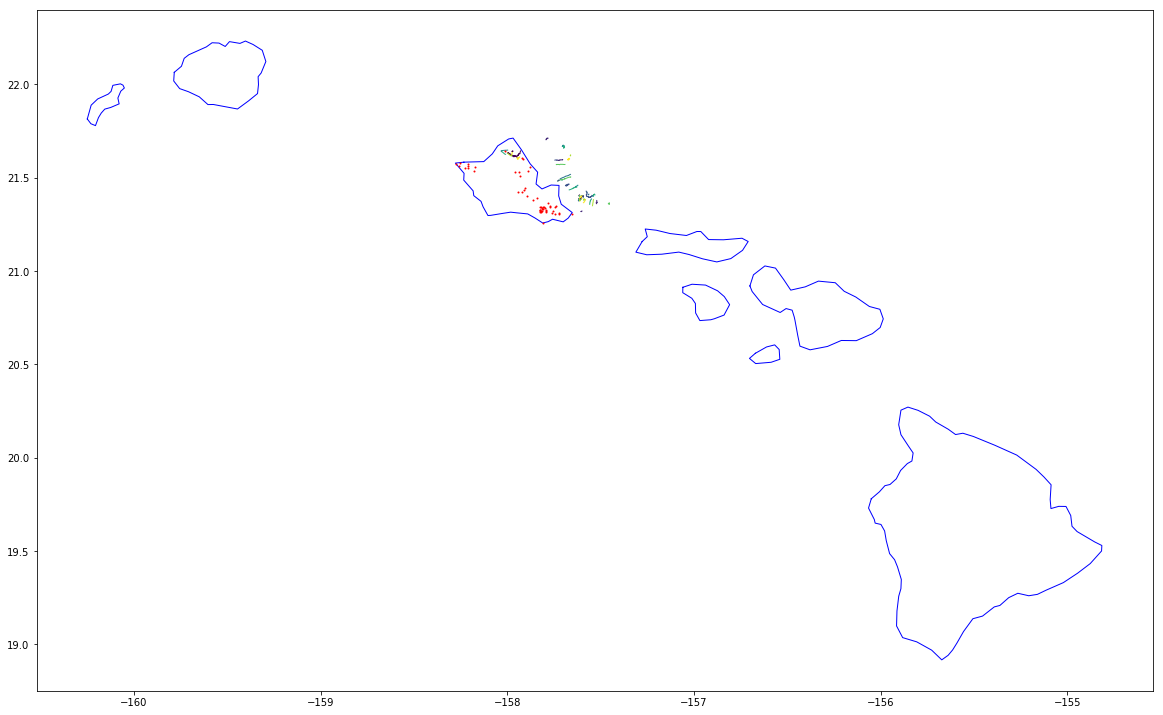

In [210]:
## M3:E1:Cell14
# Add Your Code to diplay the map
# -------------------------------
base=Hawaii.plot(figsize=(20,20),color='white',edgecolor='blue')
HiTrails.plot(ax=base)#, marker='o', color='red', markersize=5)
centr.plot(ax=base,marker='o',color='red',markersize=1)
